# Thermal Diffuse Scattering

In [25]:
%load_ext autoreload
%autoreload 2
from ase.build import mx2
from ase.visualize import view
import numpy as np

from tensorwaves.waves import PrismWaves
from tensorwaves.potentials import Potential
from tensorwaves.detect import RingDetector
from tensorwaves.tds import TDS

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
atoms = mx2(formula='MoS2', kind='2H', a=3.18, thickness=3.19)
atoms *= (2,2,1)
atoms.cell[1,0] = 0
atoms.wrap()
atoms *= (2,2,1)
atoms.center(vacuum=1, axis=2)
cell = np.diag(atoms.get_cell())
print(cell)

[12.72       11.01584314  5.19      ]


In [107]:
tds = TDS(atoms, {'Mo':.3, 'S':.3}, 30)
displaced = tds.get_displaced_atoms()
view(displaced)

In [108]:
images = []

for displaced in tds.generate():
    waves = PrismWaves(energy=80e3, cutoff=.02, interpolation=2, sampling=.1)
    S = waves.multislice(displaced)
    scan = S.gridscan(start=(0,0), end=(cell[0]/2, cell[1]/2), sampling=.2,
                       detectors=RingDetector(inner=.05, outer=.2))
    
    images.append(scan.image().numpy()[0])

Scanning [||||||||||||||||||||||||||||||||||||||||||||||||||] 837/837 


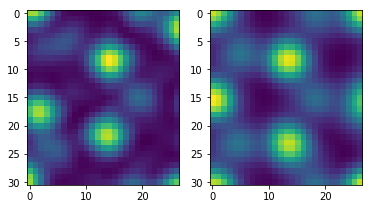

In [112]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(images[0])
ax2.imshow(np.mean(images, axis=0));